## keras使用例：2値分類

チューニング、CV等は省略

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

print(tf.__version__)

2.0.0-beta0


In [2]:
# sample dataset
num_samples = 1000
noise = 0.4

X, y = make_moons(n_samples=num_samples, noise=noise)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

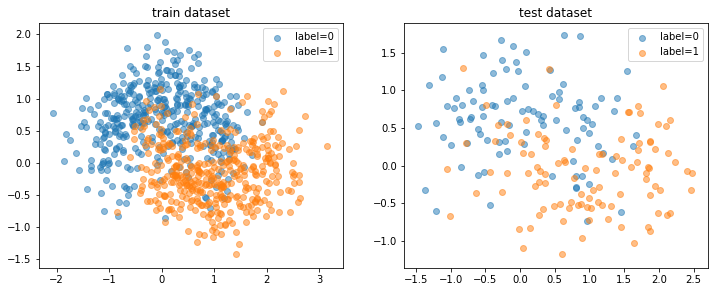

In [3]:
plt.figure(figsize=(12, 4.5))

plt.subplot(121)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], alpha=0.5, label="label=0")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], alpha=0.5, label="label=1")
plt.title("train dataset")
plt.legend()

plt.subplot(122)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], alpha=0.5, label="label=0")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], alpha=0.5, label="label=1")
plt.title("test dataset")
plt.legend();

In [4]:
# model
def build_nn_model():
    model = keras.Sequential([
        keras.layers.Dense(10, activation="relu", input_shape=(2,)),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])
    
    return model

In [5]:
model = build_nn_model()
optimizer = keras.optimizers.Adam()
model.compile(
    optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
    )

In [6]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data=(X_test, y_test),
    shuffle=True
    )

W0718 23:00:42.546169 12124 deprecation.py:323] From c:\users\ryo\anaconda3\envs\py36tf\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 314us/sample - loss: 0.7060 - accuracy: 0.4963 - val_loss: 0.6744 - val_accuracy: 0.5150
Epoch 2/100
800/800 [==============================] - 0s 93us/sample - loss: 0.6582 - accuracy: 0.4963 - val_loss: 0.6381 - val_accuracy: 0.5150
Epoch 3/100
800/800 [==============================] - 0s 70us/sample - loss: 0.6210 - accuracy: 0.4900 - val_loss: 0.6104 - val_accuracy: 0.5300
Epoch 4/100
800/800 [==============================] - 0s 72us/sample - loss: 0.5946 - accuracy: 0.5288 - val_loss: 0.5926 - val_accuracy: 0.5900
Epoch 5/100
800/800 [==============================] - 0s 85us/sample - loss: 0.5713 - accuracy: 0.6862 - val_loss: 0.5713 - val_accuracy: 0.7850
Epoch 6/100
800/800 [==============================] - 0s 75us/sample - loss: 0.5401 - accuracy: 0.8363 - val_loss: 0.5473 - val_accuracy: 0.8000
Epoch 7/100
800/800 [==============================] - 0s 66us/sample - loss:

800/800 [==============================] - 0s 70us/sample - loss: 0.3491 - accuracy: 0.8475 - val_loss: 0.4668 - val_accuracy: 0.8000
Epoch 57/100
800/800 [==============================] - 0s 64us/sample - loss: 0.3502 - accuracy: 0.8462 - val_loss: 0.4670 - val_accuracy: 0.8000
Epoch 58/100
800/800 [==============================] - 0s 61us/sample - loss: 0.3490 - accuracy: 0.8450 - val_loss: 0.4670 - val_accuracy: 0.8000
Epoch 59/100
800/800 [==============================] - 0s 61us/sample - loss: 0.3480 - accuracy: 0.8450 - val_loss: 0.4674 - val_accuracy: 0.8050
Epoch 60/100
800/800 [==============================] - 0s 60us/sample - loss: 0.3476 - accuracy: 0.8450 - val_loss: 0.4679 - val_accuracy: 0.8050
Epoch 61/100
800/800 [==============================] - 0s 59us/sample - loss: 0.3474 - accuracy: 0.8450 - val_loss: 0.4684 - val_accuracy: 0.8050
Epoch 62/100
800/800 [==============================] - 0s 67us/sample - loss: 0.3471 - accuracy: 0.8475 - val_loss: 0.4684 - val_a

In [7]:
print("test loss & accuracy: ", model.evaluate(X_test, y_test))

200/200 [==============================] - 0s 55us/sample - loss: 0.4653 - accuracy: 0.8000
test loss & accuracy:  [0.46525132179260253, 0.8]


In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

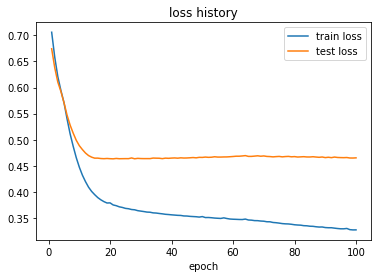

In [9]:
plt.plot(np.arange(1, 101), history.history["loss"], label="train loss")
plt.plot(np.arange(1, 101), history.history["val_loss"], label="test loss")
plt.xlabel("epoch")
plt.title("loss history")
plt.legend();

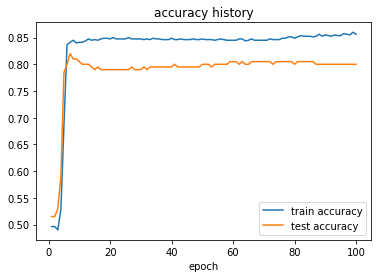

In [10]:
plt.plot(np.arange(1, 101), history.history["accuracy"], label="train accuracy")
plt.plot(np.arange(1, 101), history.history["val_accuracy"], label="test accuracy")
plt.xlabel("epoch")
plt.title("accuracy history")
plt.legend();

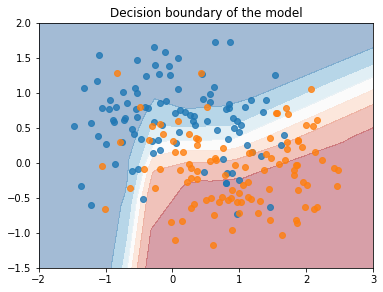

In [11]:
x0 = np.linspace(-2, 3, 1000)
x1 = np.linspace(-1.5, 2, 1000)

xx0, xx1 = np.meshgrid(x0, x1)

X_grid = np.vstack((xx0.ravel(), xx1.ravel())).T

z = model.predict(X_grid)

plt.figure(figsize=(6, 4.5))
plt.contourf(xx0, xx1, z.reshape((1000, 1000)), cmap=plt.cm.RdBu_r, alpha=0.4)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], alpha=0.8)
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], alpha=0.8)
plt.grid(False)
plt.title("Decision boundary of the model");